In [14]:
from __future__ import absolute_import
from __future__ import print_function
from tqdm import tqdm
#image are imported with a resizing and a black and white conversion
from PIL import Image
from pandas import read_csv
from os.path import isfile
from PIL import Image as pil_image
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import pickle
import numpy as np
from imagehash import phash
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
from PIL import Image
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import History

from subprocess import check_output

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

import numpy as np

import random
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, Lambda, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras import backend as K

from tqdm import tqdm

import sys
old_stderr = sys.stderr
sys.stderr = open('/dev/null', 'w')
import keras
sys.stderr = old_stderr

import random
from keras import backend as K
from keras.preprocessing.image import img_to_array,array_to_img
from scipy.ndimage import affine_transform

from keras.optimizers import SGD
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

from tqdm import tqdm_notebook

from sklearn.neighbors import KNeighborsClassifier  

SIZE = 341

In [2]:
#Change DIR to the location of the dataset
DIR = "/work/t-jachen/.kaggle/competitions/whale-categorization-playground"
tagged = dict([(p,w) for _,p,w in read_csv(DIR + '/train.csv').to_records()])
submit = [p for _,p,_ in read_csv(DIR + '/sample_submission.csv').to_records()]
join   = list(tagged.keys()) + submit
len(tagged),len(submit),len(join),list(tagged.items())[:5],submit[:5]
print(check_output(["ls", DIR]).decode("utf8"))

bounding-box.pickle.zip
sample_submission.csv
test
test.zip
train
train.csv
train.zip



In [3]:
DIR2 = './saved_arrays/'

x_train = np.load(DIR2+'x_train.npy')
y_train = np.load(DIR2+'y_train.npy')
x_test = np.load(DIR2+'x_test.npy')
y_test = np.load(DIR2+'y_test.npy')

In [4]:
model = load_model('./whale_tail_weights/base_model.h5')

/usr/local/lib/python3.5/dist-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [5]:
model.load_weights('./whale_tail_weights/weights_euclidean.hdf5', by_name = True)

In [6]:
x_train_vector = model.predict(x_train, verbose=1)

4745/4745 [==============================] - 16s 3ms/step


In [7]:
x_test_vector = model.predict(x_test, verbose=1)

382/382 [==============================] - 2s 4ms/step


In [8]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(x_train_vector, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
y_pred = classifier.predict(x_test_vector)  

In [10]:
from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(y_test, y_pred))  

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          9       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         17       0.00      0.00      0.00         0
         18       0.00      0.00      0.00         0
         20       0.00      0.00      0.00         0
         24       0.00      0.00      0.00         6
         25       0.00      0.00      0.00         0
         27       0.00      0.00      0.00         0
         30       0.00      0.00      0.00         0
         32       0.00      0.00      0.00         0
         33       0.00      0.00      0.00         0
         35       0.00      0.00      0.00         2
         41       0.00      0.00      0.00         0
         45       0.00      0.00      0.00   

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [11]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [23]:
import operator 
import math
def getNeighbors(trainingSet, trainLabels, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((x, dist))

    distances.sort(key=operator.itemgetter(1))
    #print(distances)
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [18]:
index = 0
neighbors = getNeighbors(x_train_vector, y_train, x_test_vector[index], 20)

[(2588, 0.1552245139097526), (2459, 0.17050971783985988), (1045, 0.17079686059871382), (2988, 0.1716825710658364), (3873, 0.1745552191681603), (3530, 0.1747966119934892), (4488, 0.17639382840493303), (4698, 0.1785045166584857), (306, 0.1786185493932097), (2157, 0.1801638251663546), (4225, 0.1828798203627056), (758, 0.18414613596838345), (880, 0.1844328794129023), (3900, 0.18566795850477916), (1990, 0.18654334881980122), (4498, 0.18675579379438312), (4700, 0.18698072272722305), (827, 0.18780618573836924), (2673, 0.18788840215559474), (1385, 0.18790994418362697), (1052, 0.1887880991645944), (3184, 0.18900146443757732), (4715, 0.18912521966175616), (1146, 0.1896466690854054), (3219, 0.19004489332206684), (1541, 0.19041326754091153), (4393, 0.1917495247758628), (4205, 0.19290476683497704), (3182, 0.19373641043595696), (1831, 0.19442049287312504), (3884, 0.19548388070766154), (316, 0.19567087364678773), (509, 0.1962068582102571), (3619, 0.1962841316401206), (2504, 0.19700934878148682), (144

[2588,
 2459,
 1045,
 2988,
 3873,
 3530,
 4488,
 4698,
 306,
 2157,
 4225,
 758,
 880,
 3900,
 1990,
 4498,
 4700,
 827,
 2673,
 1385]

In [20]:
neighbors, y_test[index]

([2588,
  2459,
  1045,
  2988,
  3873,
  3530,
  4488,
  4698,
  306,
  2157,
  4225,
  758,
  880,
  3900,
  1990,
  4498,
  4700,
  827,
  2673,
  1385],
 959)

In [28]:
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return [sortedVotes[0][0], sortedVotes[1][0]]

In [26]:
correct = 0
for i in tqdm_notebook(range(len(x_test_vector))):
    this_correct = 0
    neighbors = getNeighbors(x_train_vector, y_train, x_test_vector[i], 20)
    for j in range(len(neighbors)):
        if(neighbors[j]==y_test[i]):
            this_correct = 1
    correct = correct + this_correct
    print(correct)

0


/usr/local/lib/python3.5/dist-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


KeyboardInterrupt: 

In [83]:
#Find pictures of the same whale's tail
same = []
for i in range(len(y_train)):
    if(y_train[i]==429):
        same += [i]
same

[3687, 3688]

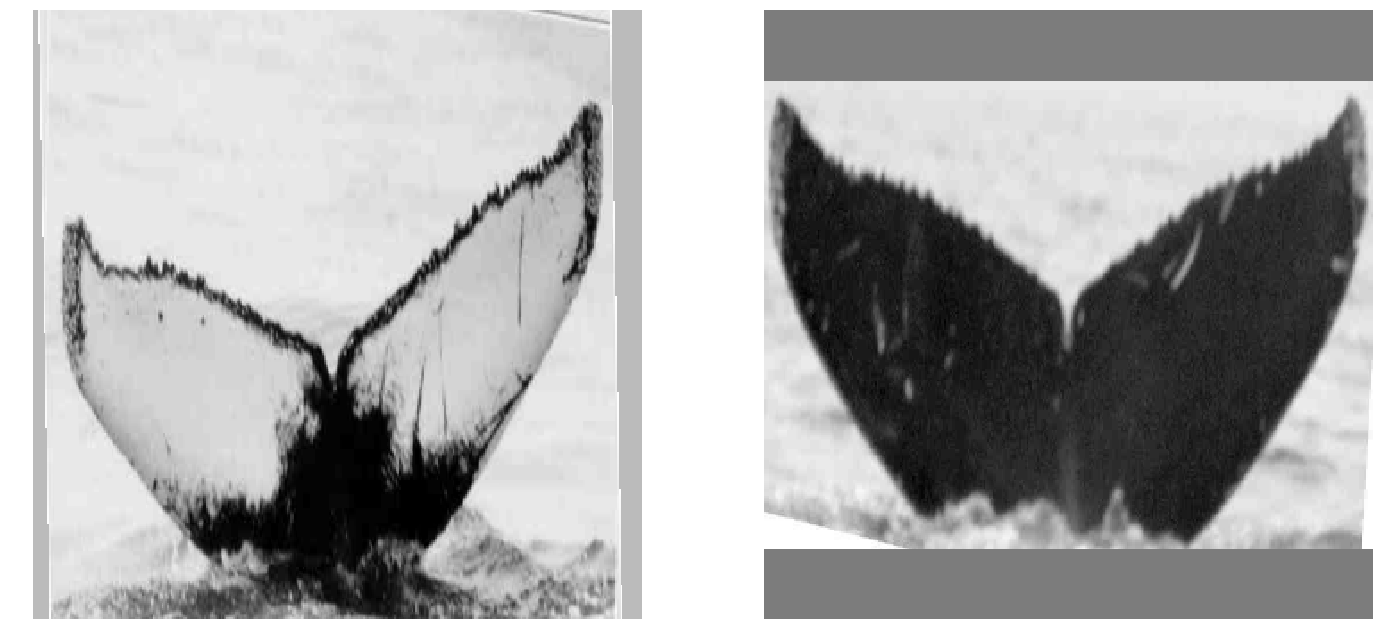

In [88]:
def show_whale(imgs, per_row=2):
    n         = len(imgs)
    rows      = (n + per_row - 1)//per_row
    cols      = min(per_row, n)
    fig, axes = plt.subplots(rows,cols, figsize=(24//per_row*cols,24//per_row*rows))
    for ax in axes.flatten(): ax.axis('off')
    for i,(img,ax) in enumerate(zip(imgs, axes.flatten())): ax.imshow(img.convert('RGB'))

imgs = [array_to_img(x_train[1]), array_to_img(x_test[13])]
show_whale(imgs, per_row=2)